In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

# Part 1: Understanding Product Categories
## Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [7]:
# Frequency Tables:
# 1. Generate a frequency table for the product category.
frequency_table= df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

# The top 5 most listed product categories are: 
## 1. Sports & Outdoors
## 2. Beauty
## 3. Handmade Clothing, Shoes & Accesories
## 4. Bath & Body
## 5. Birthday Gifts

## I have selected the categories mentioned above to display the distribution of products across different categories using the following charts: 

In [10]:
# Visualizations:
top_categories = frequency_table.nlargest(5)

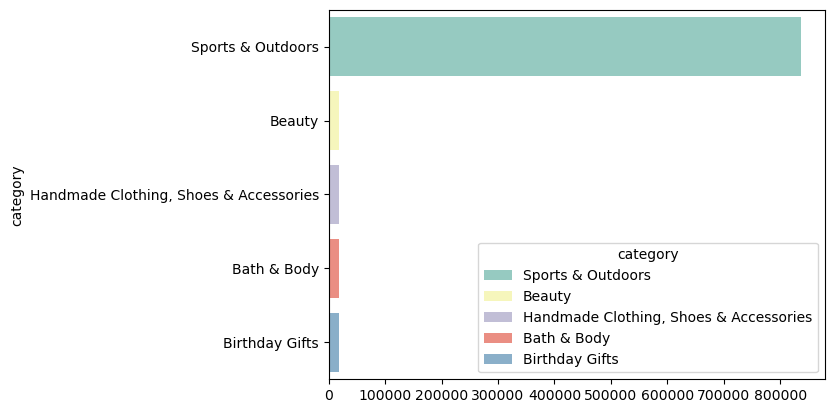

In [11]:
# Visualizations:
# 1. Display the distribution of products across different categories using a bar chart.
ax=sns.barplot(y=top_categories.index, x=top_categories.values, palette="Set3", hue=top_categories.index, legend='full')
sns.move_legend(ax, "lower right")

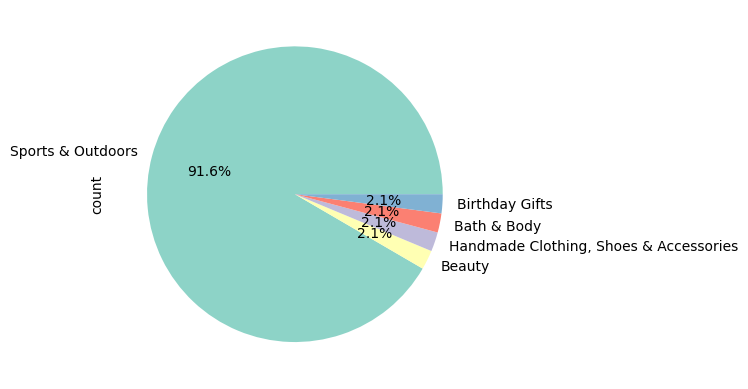

In [12]:
# 2. For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings? 
top_categories.plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Set3"));

## In both charts, we can see that Sports & Outdoors dominate the listing of categories. 

# Part 2: Delving into Product Pricing
## Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [15]:
# Measures of Centrality:
# 1. Calculate the mean, median, and mode for the price of products.
mean_price=df["price"].mean()
median_price=df["price"].median()
mode_price=df["price"].mode()[0]
print(mean_price)
print(median_price)
print(mode_price)

89.24380943923663
19.09
9.99


# The average price point of products listed is 89.24 and this value is higher than the mode (9.99):

In [17]:
# Measures of Dispersion:
# 1. Determine the variance, standard deviation, range, and interquartile range for product price.
var_price=df["price"].var()
sd_price=df["price"].std()
print(var_price)
print(sd_price)

119445.4853225653
345.6088617535223


In [18]:
min_price=df["price"].min()
max_price=df["price"].max()
range_price= max_price - min_price
quantiles_price=df["price"].quantile([0.25, 0.5, 0.75])
print(min_price)
print(max_price)
print(range_price)
print(quantiles_price)

0.0
100000.0
100000.0
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


# There is  an indicator of a significant spread in the prices, as we can see in the range of 100,000. One thing that is a suprise, is to see than the minimun price is zero. 

In [20]:
frequency_table_price= df['price'].value_counts()
frequency_table_price

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

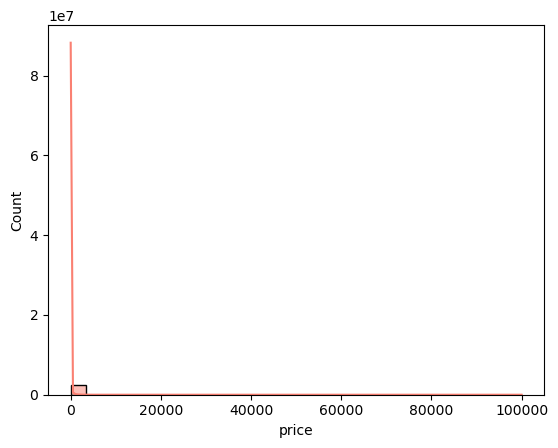

In [21]:
sns.histplot(df["price"], kde=True, bins=30, color="salmon");

In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

In [23]:
# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

## In the above histogram we tried to visualize the distribution of product prices, but it is very hard to read beacuse we have very small and very big prices (80,000 and 100,000). 
## For this reason, we decided to remove the outliers and we only considered the prices within the Q1 and Q3. 

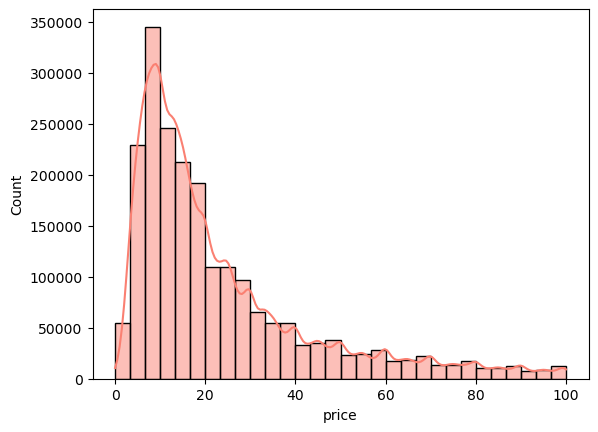

In [25]:
# Visualizations:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved. Delete the outliers. 
sns.histplot(df_filtered["price"], kde=True, bins=30, color="salmon");

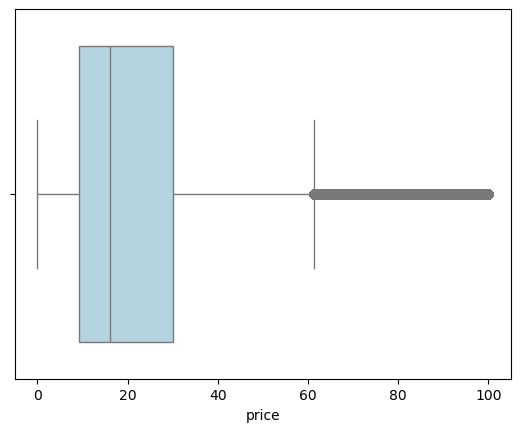

In [26]:
# Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(x=df_filtered["price"], color="lightblue");

If we look at the box plot above, we can see that there are two products that are priced significantly higher than the rest, one product of 80,000 and another one of 100,000. 

# Part 3: Unpacking Product Ratings
## Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [ ]:
# 1. Measures of Centrality:
# Calculate the mean, median, and mode for the rating of products.
# How do customers generally rate products? Is there a common trend? A= The mean is 2, most of the products does not have a rating.

In [29]:
statistics = df['stars'].agg(['mean', 'median'])
print(statistics)

mean      2.152836
median    0.000000
Name: stars, dtype: float64


In [30]:
mode_stars=df["stars"].mode()[0]
print(mode_stars)

0.0


## After calculate the mean, the median and the mode for the rating of products, we can see that most of the products does not have rating, because the average is 2 starts and que median and the mode is cero. 

In [60]:
# Measures of Dispersion:

# Determine the variance, standard deviation, and interquartile range for product rating.
var_stars = df["stars"].var()
sd_stars = df["stars"].std()
min_stars = df["stars"].min()
max_stars = df["stars"].max()
range_stars = max_stars - min_stars
quantiles_stars =df["stars"].quantile([0.25, 0.5, 0.75])

print(var_stars)
print(sd_stars)
print(min_stars)
print(max_stars)
print(range_stars)
print(quantiles_stars)

4.81743402976196
2.1948653785054697
0.0
5.0
5.0
0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


## The ratings is not consistent and there is a wide variation in customer feedback, because either the customers do not give a feedback or the feedback is zero.


In [56]:
# Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?

In [67]:
slewness_price=df["stars"].skew()
kurtosis_price=df["stars"].kurtosis()
print(slewness_price)
print(kurtosis_price)

0.08120735761080985
-1.9260061280432985


## The skewness of 0.081 is very close to 0, which suggests that the data is almost symmetrical. However, since it is positive, it means that the distribution is slightly skewed to the right.
## The negative kurtosis value of -1.926 indicates that the data distribution has lighter tails than a normal distribution:

In [76]:
# Visualizations:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

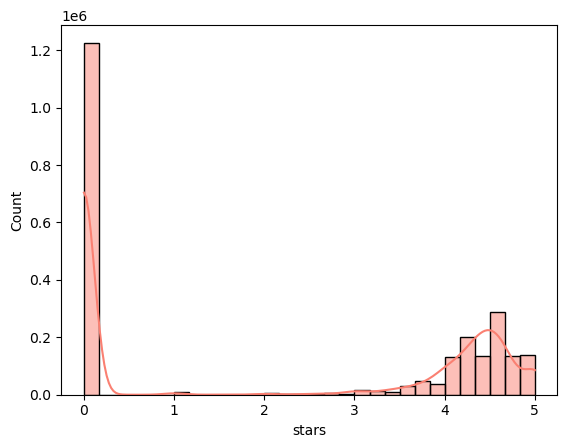

In [78]:
sns.histplot(df["stars"], kde=True, bins=30, color="salmon");

## If we take a look at the histogram above, we can see that the rating that is more common is zero. 